In [79]:
import os
import csv
import matplotlib.pyplot as plt

In [80]:
csv_files = ['Output/ordered_minerals_alunite_techniqueForward Stepwise Regression_size_111.csv', \
             'Output/ordered_minerals_alunite_techniqueHySudeB_size_111.csv', \
             'Output/ordered_minerals_alunite_techniqueLASSO Regression_size_111.csv',\
             'Output/ordered_minerals_alunite_techniqueMixed_Integer_Non-linear_Program_size_46.csv']  # List of your CSV files

csv_files1 = ['Output/ordered_minerals_kaolinite_techniqueForward Stepwise Regression_size_104.csv', \
             'Output/ordered_minerals_kaolinite_techniqueHySudeB_size_104.csv', \
             'Output/ordered_minerals_kaolinite_techniqueLASSO Regression_size_104.csv',\
             'Output/ordered_minerals_kaolinite_techniqueMixed_Integer_Non-linear_Program_size_72.csv']

csv_files2 = ['Output/ordered_minerals_montmorillonite_techniqueForward Stepwise Regression_size_107.csv', \
             'Output/ordered_minerals_montmorillonite_techniqueLASSO Regression_size_107.csv', \
             'Output/ordered_minerals_montmorillonite_techniqueHySudeB_size_107.csv',\
             'Output/ordered_minerals_montmorillonite_techniqueMixed_Integer_Non-linear_Program_size_88.csv']
#ROI_name = 'montmorillonite'  # Change this to the target mineral name as needed


In [81]:
def count_mineral_accuracy(csv_files, ROI_name):
    # Set keywords for the target mineral based on ROI_name
    if ROI_name.lower() == 'alunite':
        keywords = ['alunite', 'alun']
    elif ROI_name.lower() == 'kaolinite':
        keywords = ['kaolin', 'kaolinite', 'kaolin/smect', 'kaosmec']
    elif ROI_name.lower() == 'montmorillonite':
        keywords = ['montmorillonite', 'montm', 'montmor']
    else:
        # Default to searching for the exact ROI_name if no specific keywords are provided
        keywords = [ROI_name.lower()]

    techniques = ['LASSO Regression', 'Forward Stepwise Regression', 'Mixed_Integer_Non-linear_Program', 'HySudeB']
    technique_counts = {tech: 0 for tech in techniques}
    technique_model_counts = {tech: 0 for tech in techniques}  # To track total models per technique

    # Iterate through multiple CSV files
    for csv_file in csv_files:
        if not os.path.exists(csv_file):
            print(f"File {csv_file} does not exist.")
            continue
        
        with open(csv_file, mode='r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                technique = row['Technique']
                ordered_names = row['Ordered Name']
                technique_model_counts[technique] += 1  # Increment total models for this technique

                # Check if any keyword matches the ordered names
                if any(any(keyword in name.lower() for keyword in keywords) for name in ordered_names.split(',')):
                    technique_counts[technique] += 1

    # Compute accuracy for each technique (number of models with the target mineral / total number of models)
    technique_accuracies = {tech: (technique_counts[tech] / technique_model_counts[tech]) if technique_model_counts[tech] > 0 else 0 
                            for tech in techniques}

    # Sort techniques by accuracy
    sorted_indices = sorted(range(len(techniques)), key=lambda i: technique_accuracies[techniques[i]], reverse=True)
    sorted_techniques = [techniques[i] for i in sorted_indices]
    sorted_accuracies = [technique_accuracies[techniques[i]] for i in sorted_indices]

    # Plot the horizontal bar chart for accuracy
    plt.figure(figsize=(10, 6))
    bars = plt.barh(sorted_techniques, sorted_accuracies, color='blue')
    plt.title(f'{ROI_name.capitalize()} Detection Accuracy Across CSV Files')
    plt.xlabel('Accuracy (Proportion of Models)')

    # Add annotations (numbers) on the bars
    for bar in bars:
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', ha='left', va='center')

    plt.show()

In [82]:
def count_mineral_occurrence(csv_files, ROI_name):
    # Set keywords for the target mineral based on ROI_name
    if ROI_name.lower() == 'alunite':
        keywords = ['alunite', 'alun']
    elif ROI_name.lower() == 'kaolinite':
        keywords = ['kaolin', 'kaolinite', 'kaolin/smect', 'kaosmec']
    elif ROI_name.lower() == 'montmorillonite':
        keywords = ['montmorillonite']
    else:
        # Default to searching for the exact ROI_name if no specific keywords are provided
        keywords = [ROI_name.lower()]


    techniques = ['LASSO Regression', 'Forward Stepwise Regression', 'Mixed_Integer_Non-linear_Program', 'HySudeB']
    technique_counts = {tech: 0 for tech in techniques}

    # Iterate through multiple CSV files
    for csv_file in csv_files:
        if not os.path.exists(csv_file):
            print(f"File {csv_file} does not exist.")
            continue
        
        with open(csv_file, mode='r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                technique = row['Technique']
                ordered_names = row['Ordered Name']

                # Check for any keyword match in the ordered names
                technique_counts[technique] += sum(
                    any(keyword in name.lower() for keyword in keywords) 
                    for name in ordered_names.split(',')
                )

    # Extract counts for each technique
    mineral_counts = [technique_counts[tech] for tech in techniques]

    # Sort techniques by the number of occurrences
    sorted_indices = sorted(range(len(mineral_counts)), key=lambda i: mineral_counts[i], reverse=True)
    sorted_techniques = [techniques[i] for i in sorted_indices]
    sorted_mineral_counts = [mineral_counts[i] for i in sorted_indices]

    # Plot the horizontal bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.barh(sorted_techniques, sorted_mineral_counts, color='blue')
    plt.title(f'{ROI_name.capitalize()} Detection')
    plt.xlabel('Count')

    # Add annotations (numbers) on the bars
    for bar in bars:
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, int(bar.get_width()), ha='left', va='center')

    plt.show()

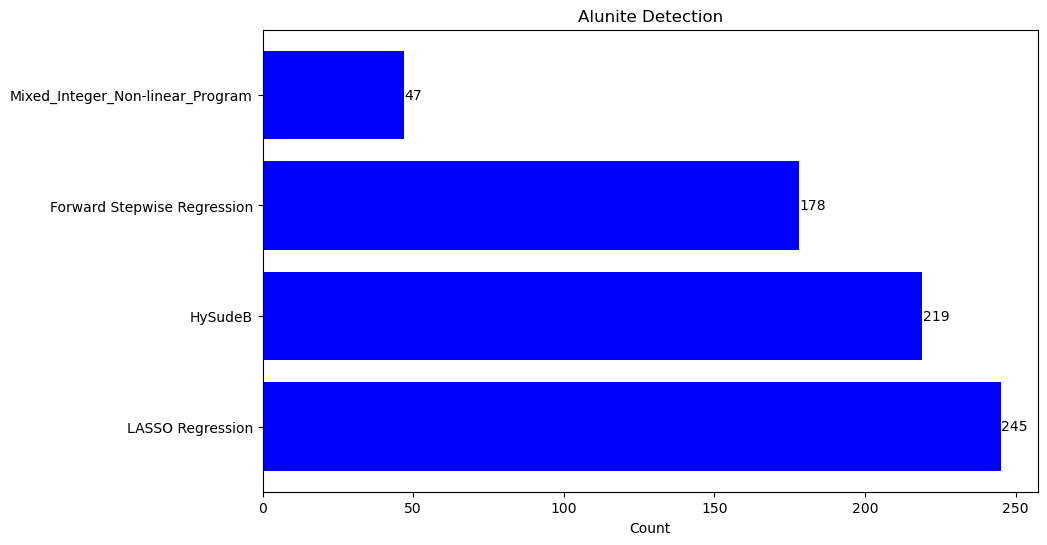

In [83]:
count_mineral_occurrence(csv_files, 'alunite')

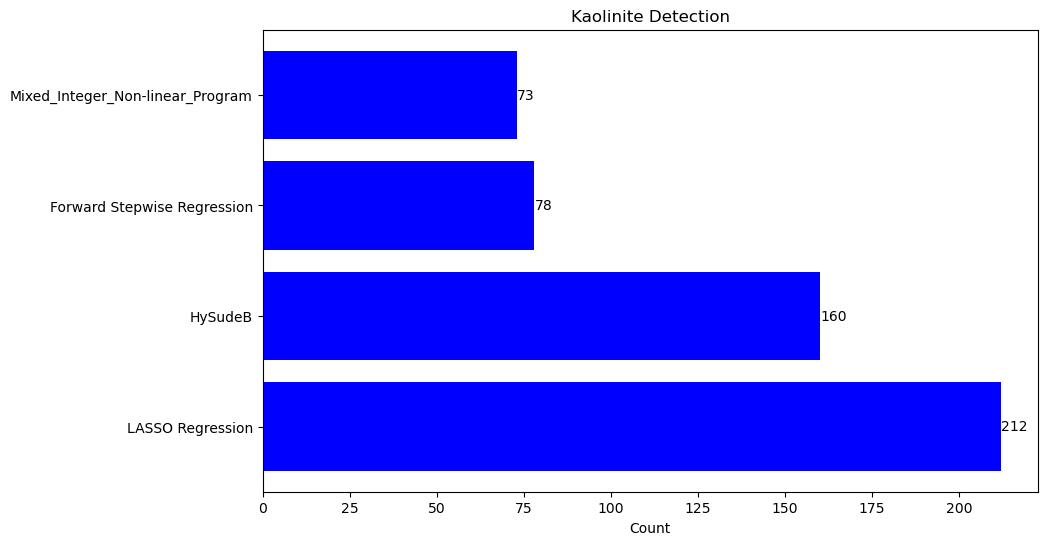

In [84]:
count_mineral_occurrence(csv_files1, 'kaolinite')

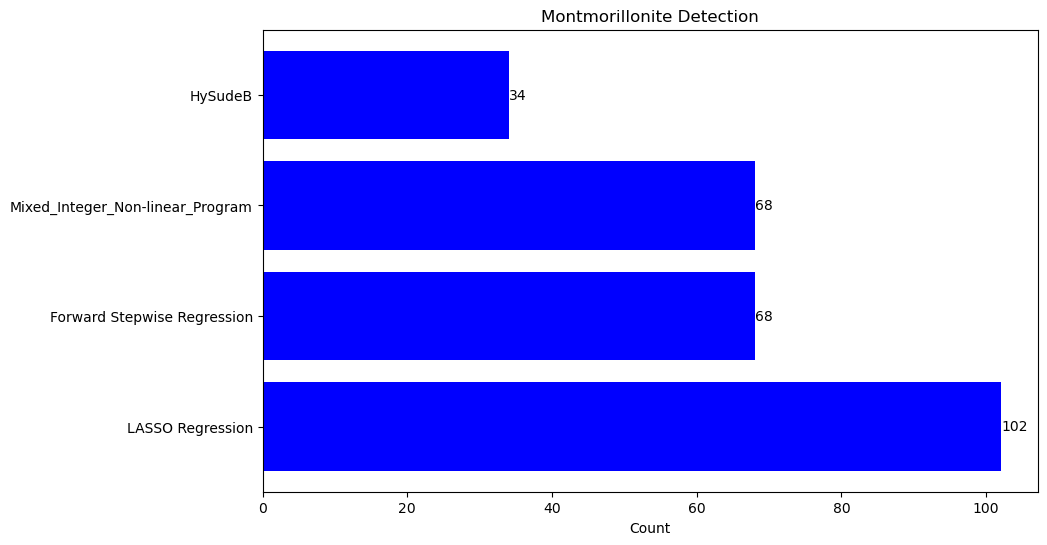

In [85]:
count_mineral_occurrence(csv_files2, 'montmorillonite')

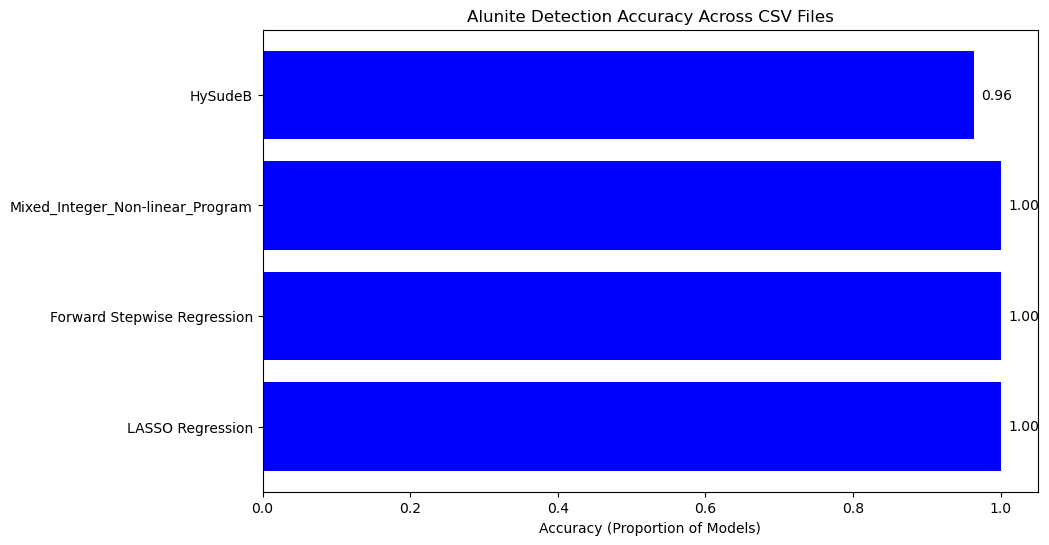

In [86]:
count_mineral_accuracy(csv_files, 'alunite')

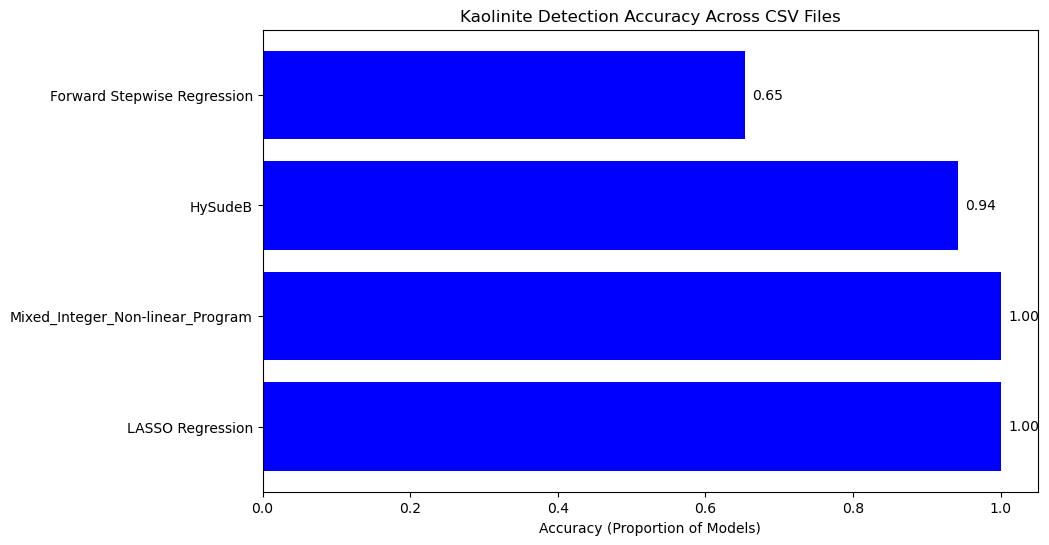

In [87]:
count_mineral_accuracy(csv_files1, 'kaolinite')

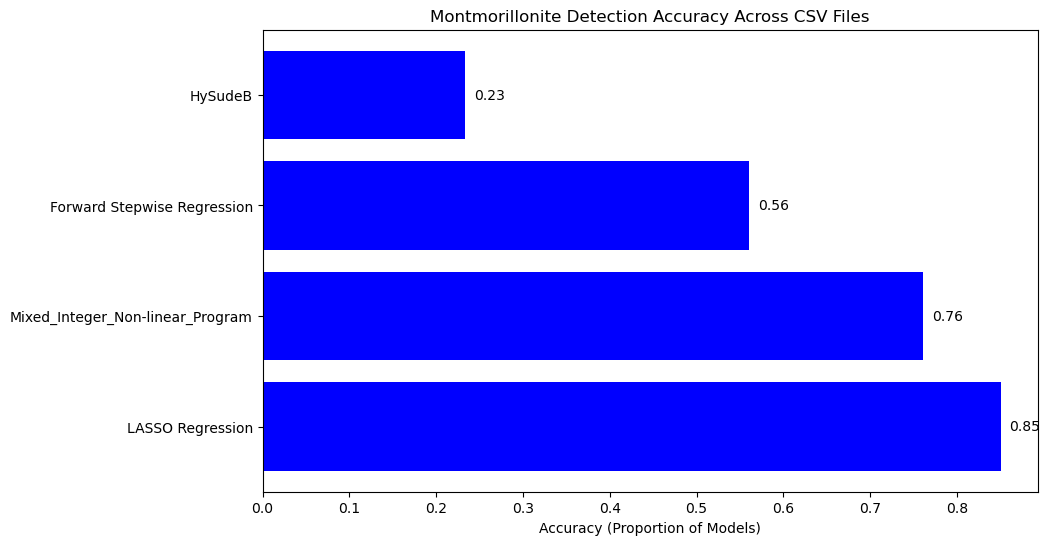

In [88]:
count_mineral_accuracy(csv_files2, 'montmorillonite')